In [1]:
import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
td = data.tourism_data

models = {}

In [4]:
X = np.array(td["Tourism_Numbers"]).reshape(-1, 1)

for i in td:
    if i == "Tourism_Numbers" or i == "Year":
        continue
    # Convert the dependent variable `td[i]` to a numpy array and reshape
    y = np.array(td[i]).reshape(-1, 1)
    # Find valid entries (those not equal to -1) and create the mask
    mask = y != -1
    # Apply the mask to both `y` and `X`, ensuring `X_mask` remains 2D
    y = y[mask].reshape(-1, 1)
    X_mask = X[mask.flatten()].reshape(-1, 1)
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_mask, y)
    print(f"Model for {i}: Coefficients = {model.coef_}, Intercept = {model.intercept_}")
    models[i] = model


Model for stsfy: Coefficients = [[-4.40607789e-05]], Intercept = [210.4869422]
Model for Crowding_at_Mendenhall_Glacier: Coefficients = [[1.24175024e-05]], Intercept = [42.23499347]
Model for Crowding_on_sidewalks_downtown: Coefficients = [[5.32383947e-06]], Intercept = [50.14555911]
Model for Vehicle_congestion_downtown: Coefficients = [[1.5386367e-05]], Intercept = [35.56003001]
Model for Flightseeing_noise: Coefficients = [[-1.78419261e-06]], Intercept = [45.74219141]
Model for Air_emissions_from_cruise_ships: Coefficients = [[-7.10803208e-06]], Intercept = [47.5966323]
Model for Vehicle_congestion_outside_of_downtown: Coefficients = [[1.15182215e-05]], Intercept = [25.44912251]
Model for Whale_watching_boat_traffic_and_wakes: Coefficients = [[1.36021744e-05]], Intercept = [24.30222142]
Model for Crowding_on_trails: Coefficients = [[7.6788143e-06]], Intercept = [26.96608167]
Model for Street_Services: Coefficients = [[2.52596277]], Intercept = [2377182.25224977]
Model for Wastewater

In [5]:
# 用模型来计算其他年份的数据
td_pred = {}
for key in td.keys():
    td_pred[key] = []
    
print(td_pred)

{'Year': [], 'Tourism_Numbers': [], 'stsfy': [], 'Crowding_at_Mendenhall_Glacier': [], 'Crowding_on_sidewalks_downtown': [], 'Vehicle_congestion_downtown': [], 'Flightseeing_noise': [], 'Air_emissions_from_cruise_ships': [], 'Vehicle_congestion_outside_of_downtown': [], 'Whale_watching_boat_traffic_and_wakes': [], 'Crowding_on_trails': [], 'Street_Services': [], 'Wastewater': [], 'Public_Transit': [], 'Parks_and_Recreation': [], 'Docks': [], 'Ports': [], 'JNU_Composite': [], 'Grocery_Items': [], 'JNU_Housing': [], 'Utilities': [], 'Transportation': [], 'Healthcare': [], 'Misc._Good_and_Services': []}


In [25]:
X = np.array(td["Tourism_Numbers"]).reshape(-1, 1)
# print(X)

for key in td_pred:
    if key == "Tourism_Numbers" or key == "Year":
        td_pred[key] = td[key]
        continue
    model = models[key]
    y = model.predict(X)
    td_pred[key] = y.flatten()
    
# print(td_pred)

年份和指标的关系

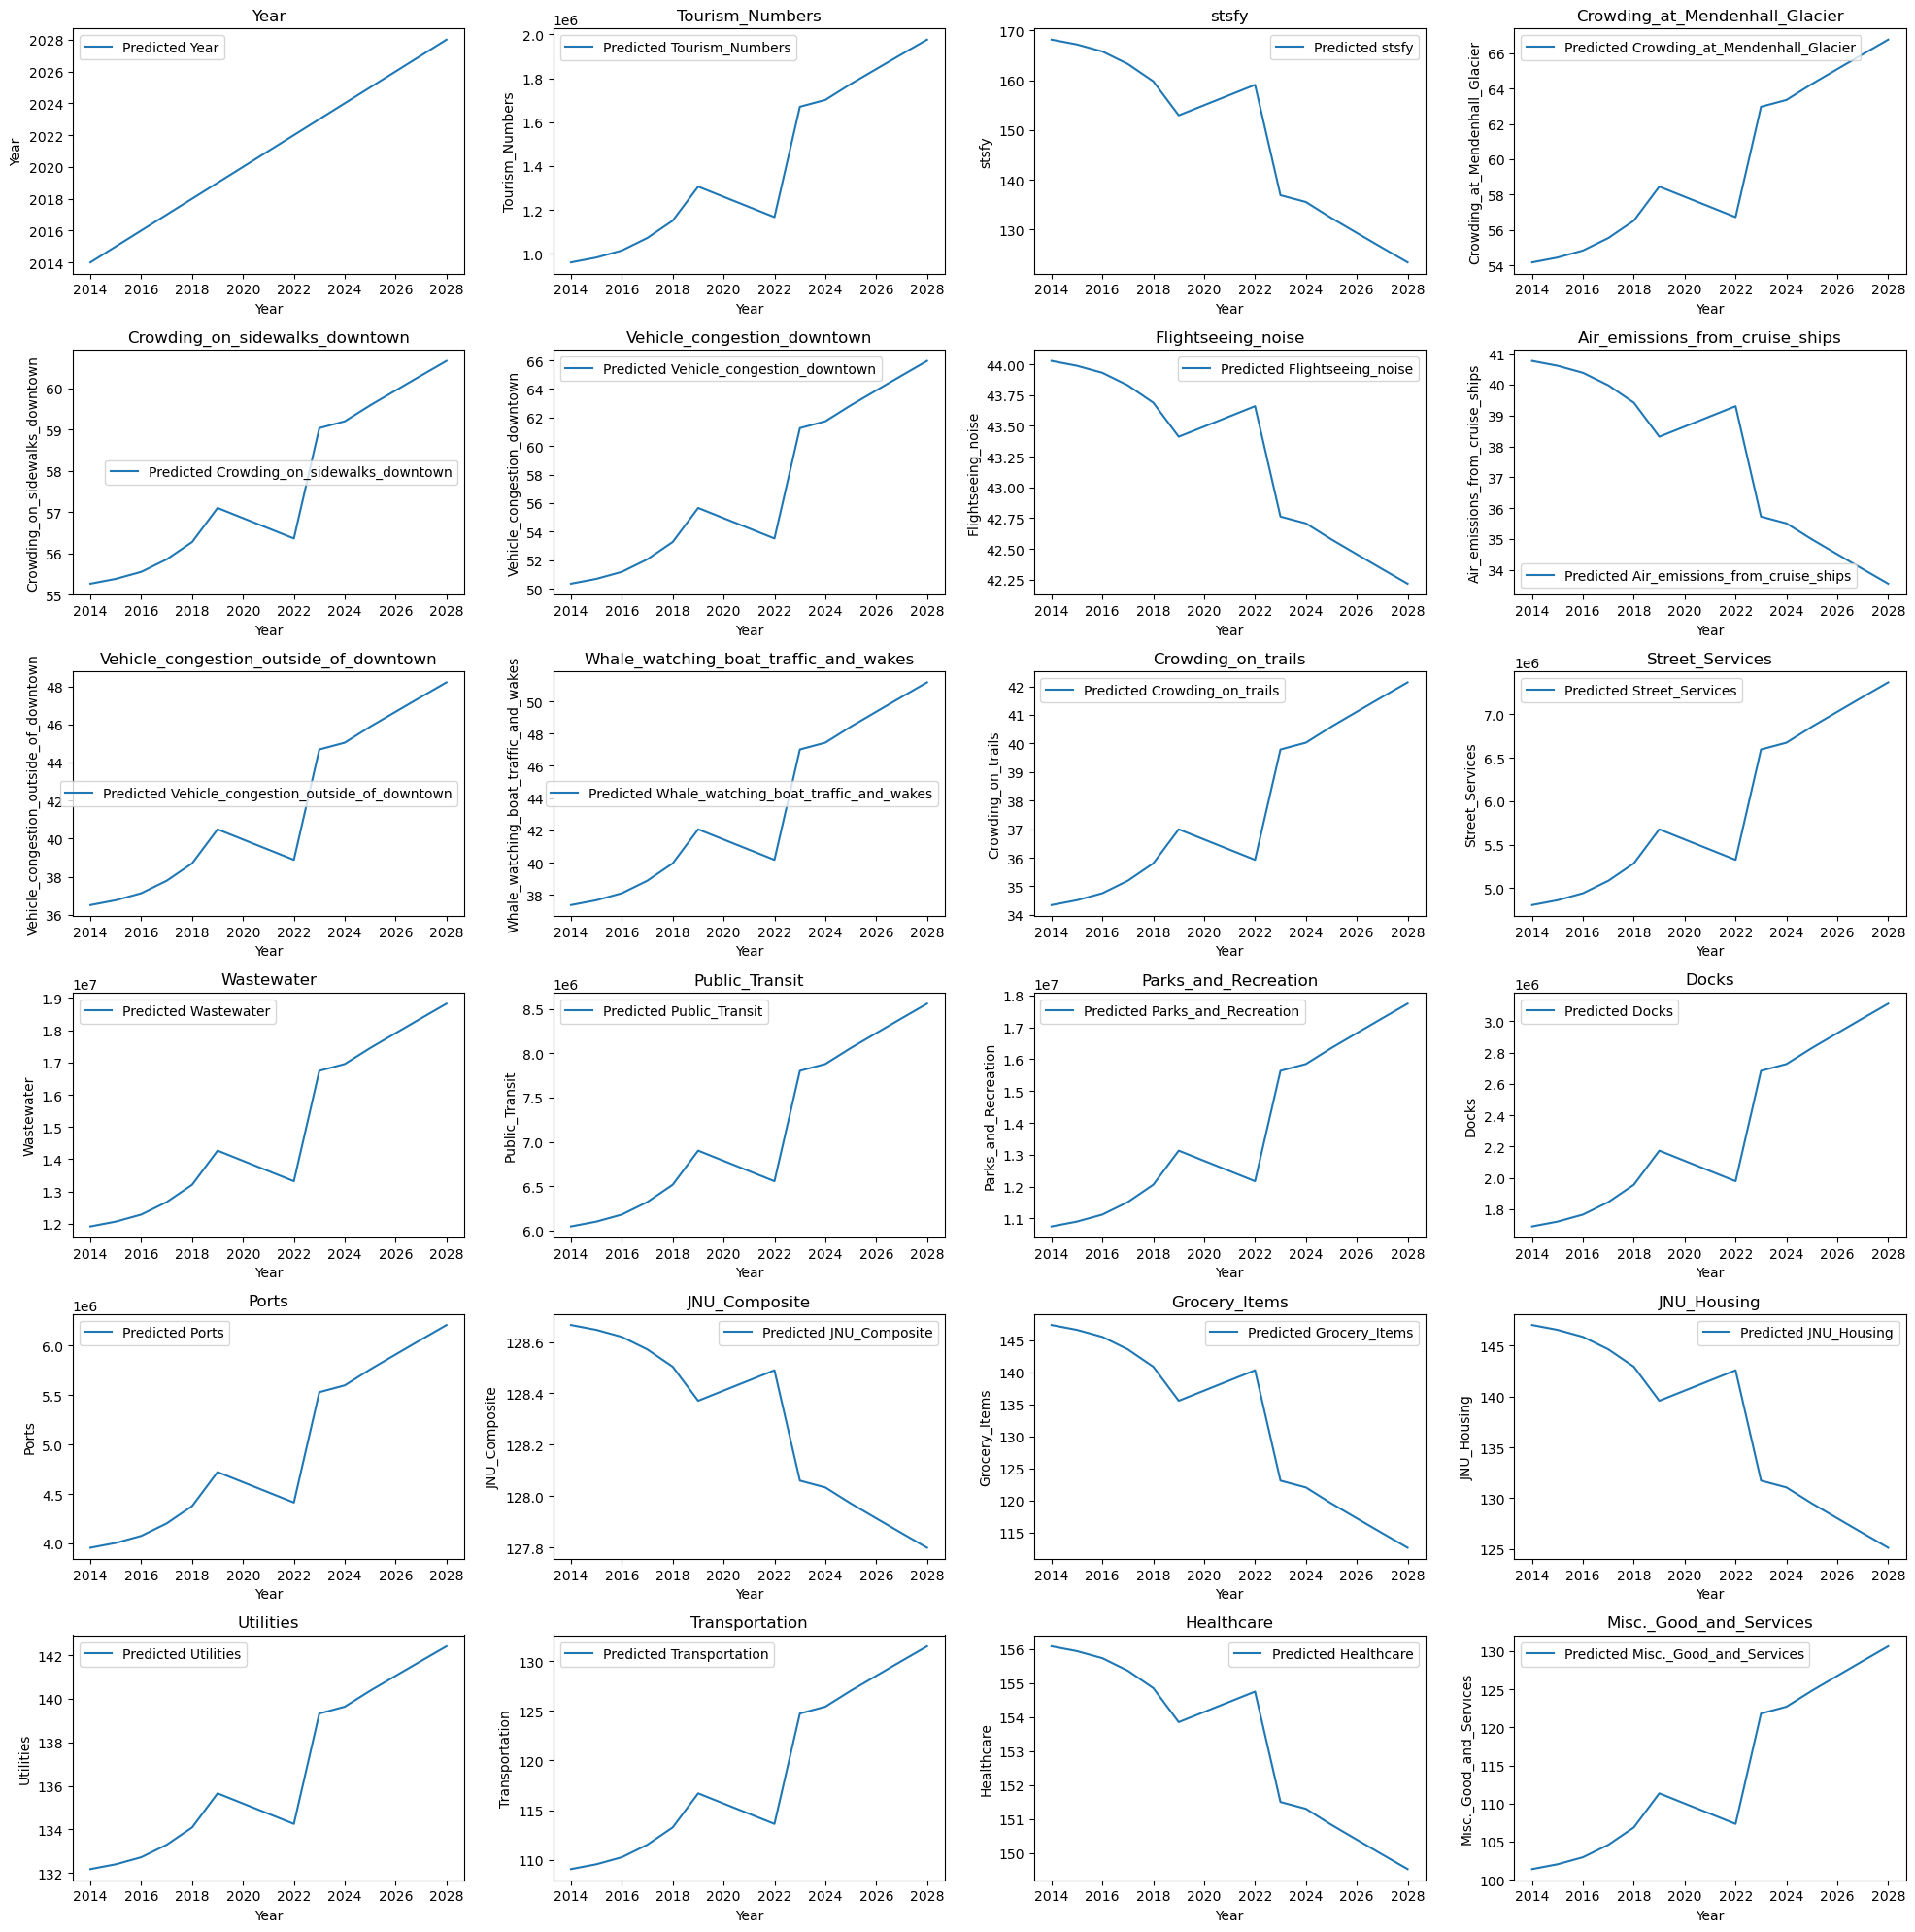

In [27]:
# 画图
fig, axs = plt.subplots(6, 4, figsize=(20, 20))
axs = axs.flatten()

for idx, key in enumerate(td_pred.keys()):
    axs[idx].plot(td["Year"], td_pred[key], label=f'Predicted {key}')
    axs[idx].set_title(key)
    axs[idx].set_xlabel('Year')
    axs[idx].set_ylabel(key)
    axs[idx].legend()

plt.tight_layout()
plt.show()

游客量和指标的关系

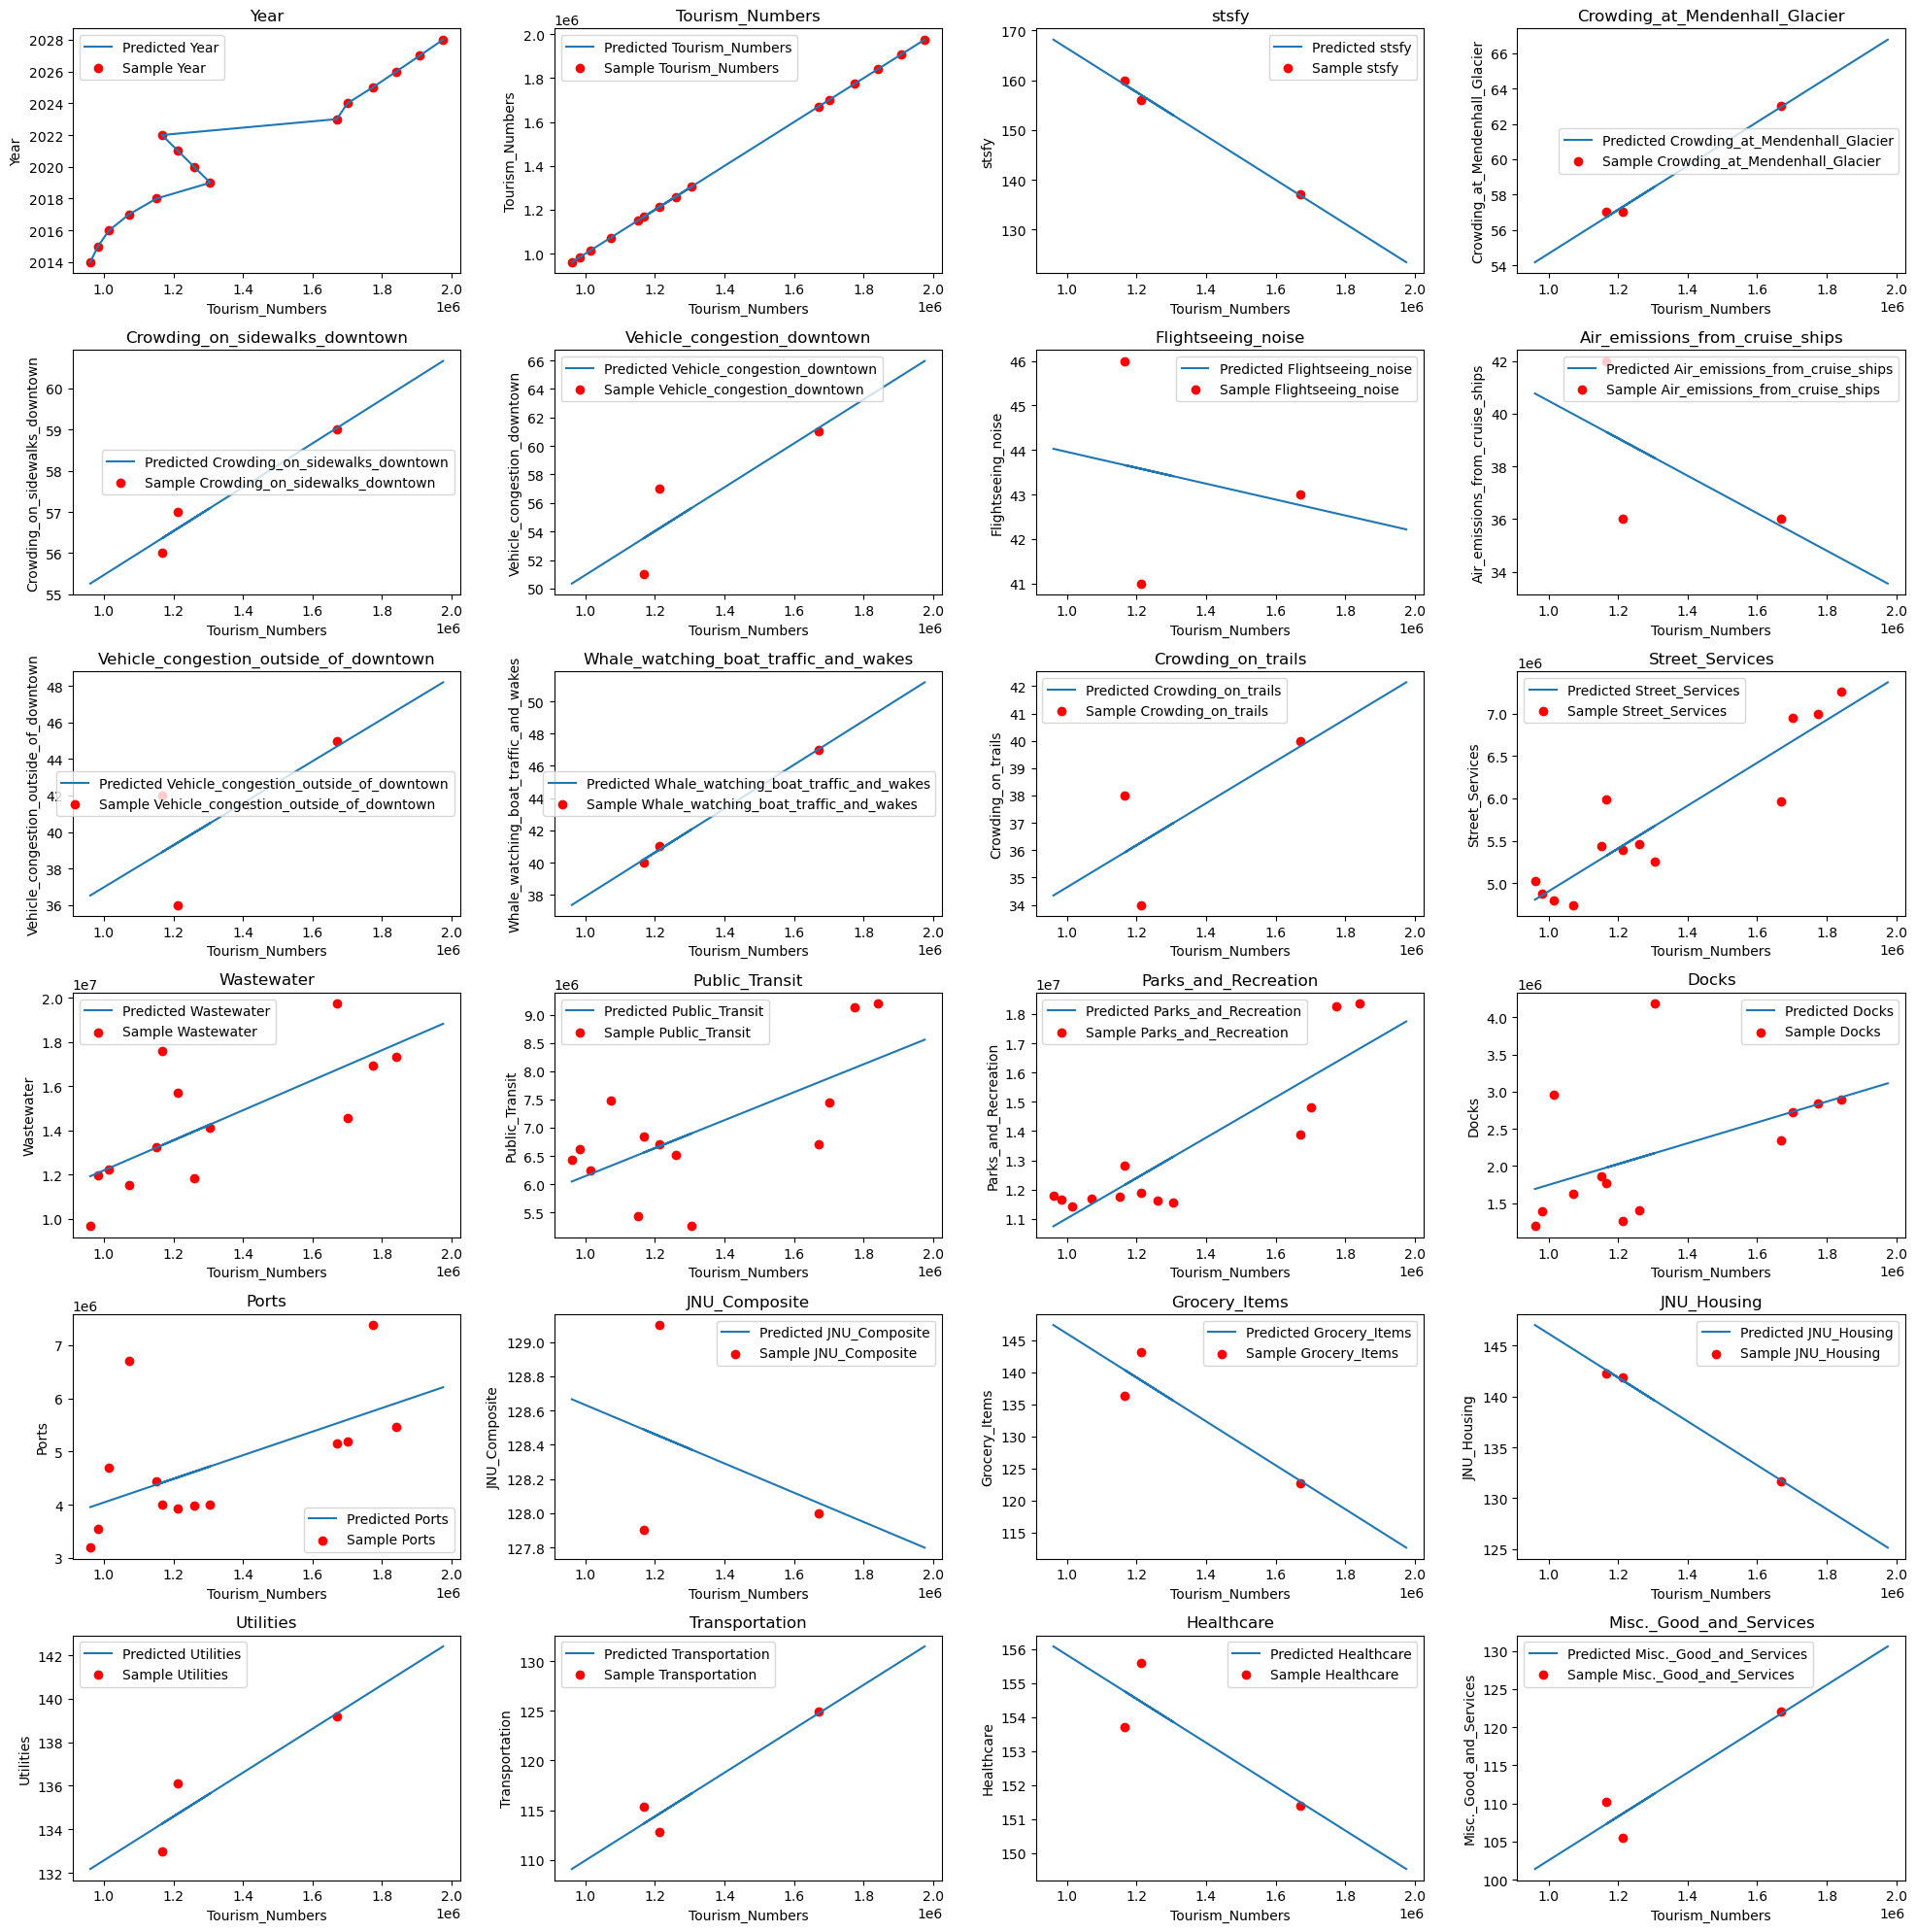

In [31]:
# 画图
fig, axs = plt.subplots(6, 4, figsize=(20, 20))
axs = axs.flatten()

for idx, key in enumerate(td_pred.keys()):
    axs[idx].plot(td["Tourism_Numbers"], td_pred[key], label=f'Predicted {key}')
    valid_samples = np.array(td[key]) != -1
    axs[idx].scatter(np.array(td["Tourism_Numbers"])[valid_samples], np.array(td[key])[valid_samples], color='red', label=f'Sample {key}')
    axs[idx].set_title(key)
    axs[idx].set_xlabel('Tourism_Numbers')
    axs[idx].set_ylabel(key)
    axs[idx].legend()

plt.tight_layout()
plt.show()